# Intuit Quickbooks Upgrade

* Team-lead GitLab userid: dbeaudreau
* Group name: Team Nine From Outer Space
* Team member names: Danielle Beaudreau, Nicholas Feldman, Wan-Ting Hsu, Chenxuan Liu, Yijie Shi

## Setup

Please complete this python notebook with your group by answering the questions in `intuit.pdf`. Create a Notebook and HTML file with all your results and comments and push both the Notebook and HTML file to GitLab when your team is done. All results MUST be reproducible (i.e., the TA and I must be able to recreate the HTML file from the Jupyter Notebook without changes or errors). This means that you should NOT use any python-packages that are not part of the rsm-msba-spark docker container.

This is the first group assignment for MGTA 455 and you will be using Git and GitLab. If two people edit the same file at the same time you could get what is called a "merge conflict". This is not something serious but you should realize that Git will not decide for you who's change to accept so the team-lead will have to determine the edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitLab. Make "pull first" a habit!

If multiple people are going to work on the assignment at the same time I recommend you work in different notebooks. You can then `%run ...`  these "sub" notebooks from the main assignment file. You can seen an example of this in action below for the `question1.ipynb` notebook

Some group work-flow tips:

* Pull, edit, save, stage, commit, and push
* Schedule who does what and when
* Try to avoid working simultaneously on the same file 
* If you are going to work simultaneously, do it in different notebooks, e.g., 
    - question1.ipynb, question2.ipynb, question3.ipynb
* Use the `%run ... ` command to bring different pieces of code together into the main jupyter notebook
* Put python functions in modules that you can import from your notebooks. See the example below for the `example` function defined in `utils/functions.py`

A graphical depiction of the group work-flow is shown below:

![](images/git-group-workflow-wbg.png)

Tutorial videos about using Git, GitLab, and GitGadget for group assignments:

* Setup the MSBA server to use Git and GitLab: https://youtu.be/zJHwodmjatY
* Dealing with Merge Conflicts: https://youtu.be/qFnyb8_rgTI
* Group assignment practice: https://youtu.be/4Ty_94gIWeA

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrsm as rsm
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import preprocessing
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import logit
import qgrid
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from utils import functions as f
import os
# increase plot resolution
# mpl.rcParams["figure.dpi"] = 150

In [2]:
## loading the data - this dataset must NOT be changed
intuit75k = pd.read_pickle("data/intuit75k.pkl")
intuit75k["res1_yes"] = rsm.ifelse(intuit75k.res1 == "Yes", 1, 0)
# intuit75k.head()

In [3]:
# show dataset description
# rsm.describe(intuit75k)

## Executive Summary

The goal of this assignment is to develop various models to determine which customers to mail the second wave of offer for upgrading their software to version 3. Models are developed using RFM analysis, logistic regression, and neural networks, and the primary target is to maximize predicted profit. 

Using similar explanatory variables, the neural networks model produces comparable results as the logistic regression model does. While RFM analyses are easy to conduct, the results are lackluster in comparison. 

The neural network model's performance is sufficiently better than the logistic regression model, despite the inability to logically interpret its predictive process. It is, therefore, chosen as the outstanding model. The logistic regression model, however, can be used to help with the explanations as they have very similar performances and metrics.

## RFM

In [4]:
%run ./sub-notebooks/rfm.ipynb


At 0.05 significance and an acceptable error of 0.02, the minimum bin size needed to ensure statistical significance is calculated to be 439.

Current RFM division is done with 6-3-4 quantiles respectively, giving a total of 72 bins.


For independent quantiling RFM, Intuit should send to 9445 customers costing 13317.45. 
It's expected to have 341 responses at 3.61%, the predicted revenue is 20467.57. 
The predicted profit is 7150.12, and ROME 53.69%.

For independent quantiling RFM, Intuit sends to 9445 customers costing 13317.45. 
There are 347 responses at 3.67%, the revenue is 20820.00. 
The actual profit is 7502.55, and ROME 56.34%.

For sequential quantiling RFM, Intuit should send to 9472 customers costing 13355.52. 
It's expected to have 342 responses at 3.61%, the predicted revenue is 20542.94. 
The predicted profit is 7187.42, and ROME 53.82%.

For sequential quantiling RFM, Intuit sends to 9472 customers costing 13355.52. 
There are 350 responses at 3.69%, the revenue is 20

The 6-3-4 configuration for RFM bins is a trade-off among multiple criteria, including having a decent number of bins mostly with acceptable sizes and maximizing profit. For independent quantiling, there exists one bin (624) that is less than half the minimum bin size of 439. For sequential quantiling, the bins with sizes smaller than the minimum are at least close enough. Not only does sequential quantiling RFM return a higher expected profit (both predicted and validated), it doesn't have a bin that's significantly smaller than the calculated minimum.

## Logistic Regression

In [5]:
%run ./sub-notebooks/logit.ipynb

               index      OR      OR%    2.5%   97.5% p.values     
1  ver_upgrade[T.01]   2.846   184.6%   2.570   3.150   < .001  ***
2  ver_upgrade[T.10]   2.256   125.6%   2.029   2.508   < .001  ***
3            zip_008  20.714  1971.4%  18.231  23.536   < .001  ***
4        numords_std   1.450    45.0%   1.394   1.508   < .001  ***
5   dollars_norm_std   1.099     9.9%   1.053   1.147   < .001  ***
6           last_std   0.647   -35.3%   0.618   0.678   < .001  ***
7         owntaxprod   1.382    38.2%   1.127   1.696    0.002   **

Pseudo R-squared (McFadden): 0.145
Pseudo R-squared (McFadden adjusted): 0.145
Area under the RO Curve (AUC): 0.766
Log-likelihood: -8585.867, AIC: 17187.734, BIC: 17258.683
Chi-squared: 52121.387 df(7), p.value < 0.001 
Nr obs: 52,500

None

Using logistic regression, Intuit should send to 6539 customers costing 9219.99. 
It's expected to have 359 responses at 5.49%, the predicted revenue is 21530.54. 
The predicted profit is 12310.55, and ROME 133.5

Numeric values are standardized for cross-comparisons. The variable for monetary spending is normalized with respect to the number of orders to eliminate the correlation between them.

Gender, bizflag and sincepurch were not statistically significant, and the odds ratios were close to 1. This suggests that they don't influence the performance and predictive power significantly, so they were dropped from the final model.

Regarding the current user version and the variable upgraded, there is a clear connection in between: if upgraded is 1, then the current version has to be 0, and vice versa. There exists some customers with a current version of 0 (version 2) without upgrading, so there are only three categories of customer versions/upgraded combinations: 10 (version 1 without upgrading), 00 (version 2 without upgrading), and 01 (version 2 upgraded version 1). This variable is used instead of the original 2, which has no impact on the model performance at all, but nevertheless tidier.

The zip code bins turn out to be highly significant with the most influential odds ratios. Specifically, the first zip code bin is approximately 5 to 10 times better than other bins. Upon further digging, zip codes starting with 008, which belong to bin 1, have a high count of customers as well as a high response rate at approximately 40%. Therefore, a new variable called zip_008 is created to represent those outstanding zip codes.

After incorporating zip_008 into the model, most of the zip_bins show no significant difference when compared to bin 1 except for bins 12 and 18. All odds ratios for zip code bins turn out higher than 1, suggesting that when the impact of the 008** zip codes is isolated out using zip_008 from bin 1, the rest of zip codes in bin 1 perform no better than other zip code bins.

The new variable zip_008 has an extremely high odds ratio at approximately 20, which may be due to the fact that those zip codes are on the U.S. Virgin Islands, which is known for providing tax incentives to business owners in order to boost the local economy.

The original zip code bins are excluded from the model as the performance doesn't change much, and the pseudo R-squared metric improves. 

The odds ratios make intuitive and logical sense. Customers who had upgraded from version 1 to 2 are more likely to upgrade to version 3. Customers who didn't upgrade to version 2 are also more likely to upgrade compared to those who start off with version 2, probably in need to improve the functionality. The frequency of purchase shows a positive relationship with likelihood of upgrade as well. The average spending per order, while statistically significant, has little effect as the odds ratio is quite low even after standardization. Time passed since last purchase has a negative odds ratio percentage, which is consistent with the RFM models. Owners of tax products are also more likely to make the upgrade.

The explanatory features are chosen such that they are statistically significant, optimized for AIC, BIC and AUC scores, as well as the adjusted pseudo R-squared. For models with more features, AIC drops but BIC increases, suggesting that overall the model performance doesn't vary much with the inclusion of comparatively trivial variables.

## Neural Networks

/tmp/ipykernel_8507/3592216224.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nn_df_train["pred_nn"]= clf.predict_proba(X_train)[:, 1] * 0.5  # [:,1] will return the probabilities of getting the output as 1
/tmp/ipykernel_8507/3592216224.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nn_df_test["pred_nn"]= clf.predict_proba(X_test)[:, 1] * 0.5


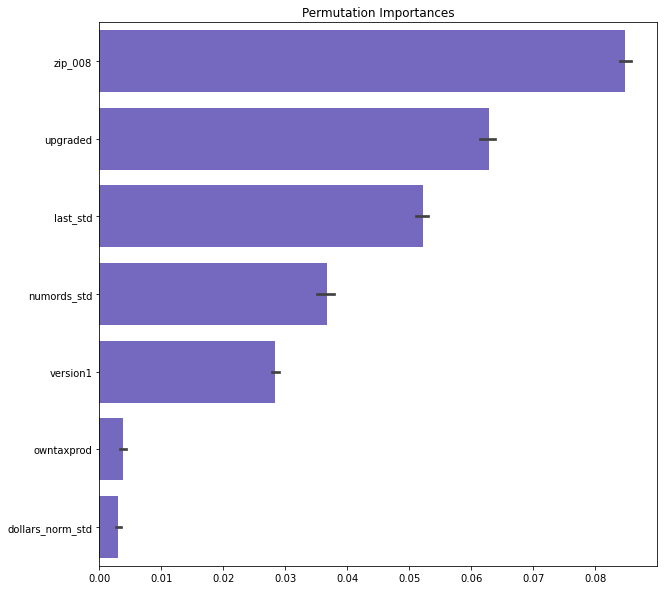


Using neural network, Intuit should send to 6445 customers costing 9087.45. 
It's expected to have 366 responses at 5.68%, the predicted revenue is 21950.46. 
The predicted profit is 12863.01, and ROME 141.55%.

Using neural network, Intuit sends to 6445 customers costing 9087.45. 
There are 373 responses at 5.79%, the revenue is 22380.00. 
The actual profit is 13292.55, and ROME 146.27%.


In [6]:
%run ./sub-notebooks/neural.ipynb

Numeric variables are standardized, and the factors being used are split into multiple logical columns. The 008** zip codes are isolated as with the logistic regression model. The same features are passed into the neural network model as with the logistic regression model. 

The neural network is set up to have 1 hidden layer with 2 nodes. Numerous setups were tested using grid search, and (4,2) returns the highest AUC value among other configurations. Furthermore, most setups return similar values for predicted profit, so the (4,2) configuration is chosen. It's worth noting, however, that the grid search algorithm sometimes returns different optimal configurations; most give very similar AUC scores that differ by 0.01. The grid search is done in a separate file to save time.

The above plot shows the permutation importance of explanatory variables included in the neural networks model. Initially all variables were passed into the model, and the less important ones were subsequently dropped, such as gender, sincepurch and bizflags. Eventually, the remaining explanatory variables highly resemble those used in the logistic regression model.

## Model Recommendation

The RFM models perform significantly worse than the other two models developed, both in terms of profit and accuracy according to metrics such as AUC, precision and accuracy. While they are relatively simple to carry out, their performance is clearly underwhelming.

The neural networks model achieves slightly better results than the logistic regression model, and they end up using similar explanatory variables after dropping the ones with low importance. Therefore, the logistic regression model will be used as a supplement for interpretation, and the neural network model is preferred.

## Profit Extrapolation

The extrapolation to the rest of the 801,821 customers in the dataset is carried out using the neural network model.

In [7]:
%run ./sub-notebooks/profit_extrapolate.ipynb


Using neural network, Intuit should send to 218653 customers out of the 763334 remaining in the dataset. The profit is expected to be 450962.46.


## Plots


The gains plots below compare each model's training and validation performances. There is no significant separation between the gains curves, suggesting that overfitting hasn't occurred.



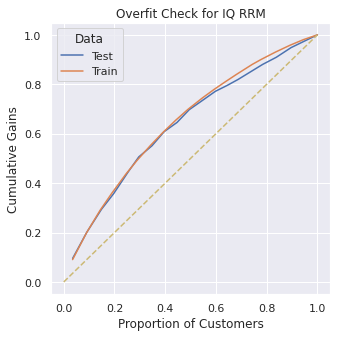

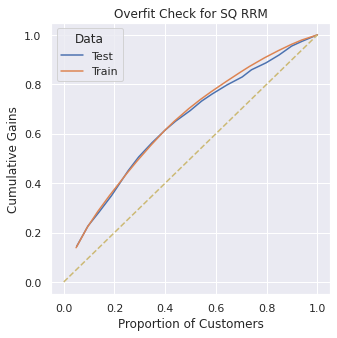

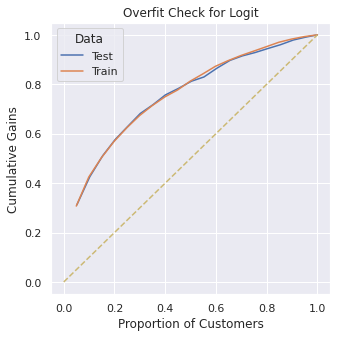

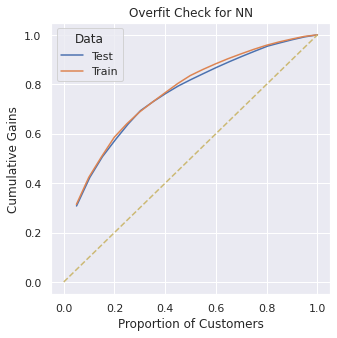



Below is the odds ratios plot for the logistic regression model to visualize the variables' relative impact on the prediction.



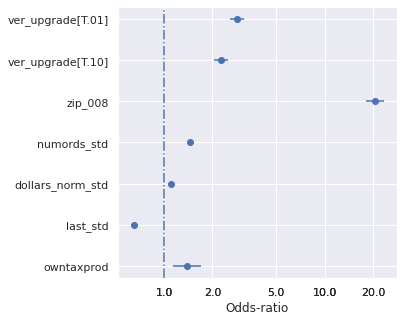



Below are the plots for gains, lift, and profit for the developed models to compare against each other.



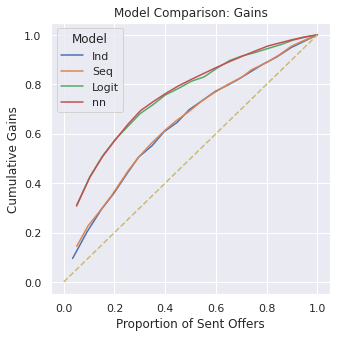

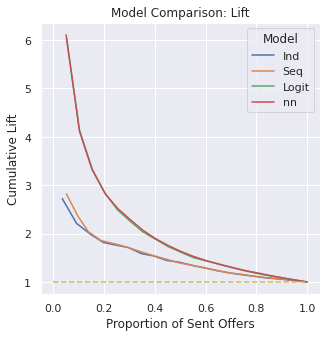

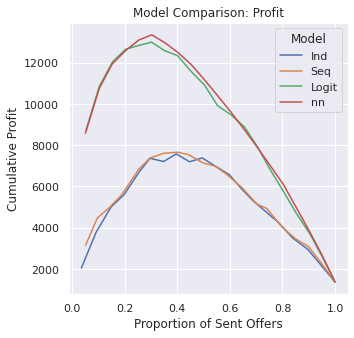



Below are plots for the response rates and the breakeven rate for each of the RFM bins.



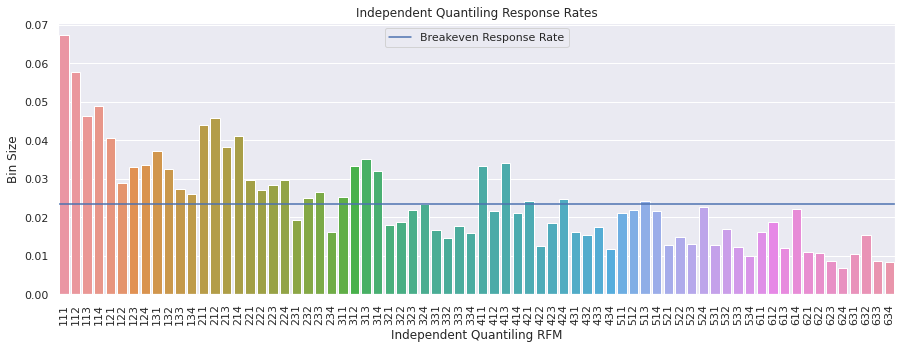

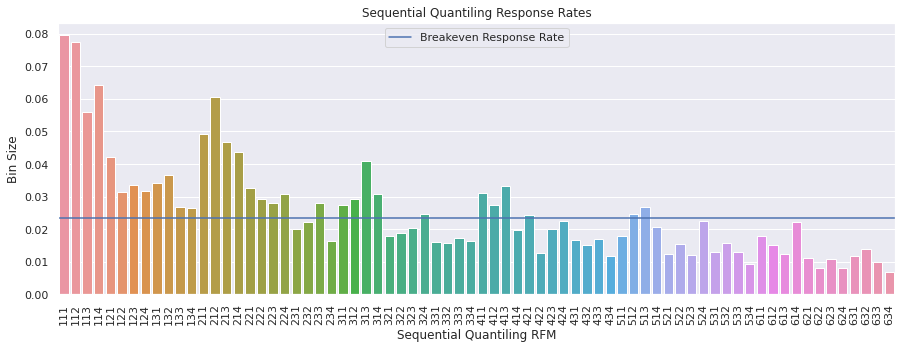



Below are plots for checking the RFM bin sizes.



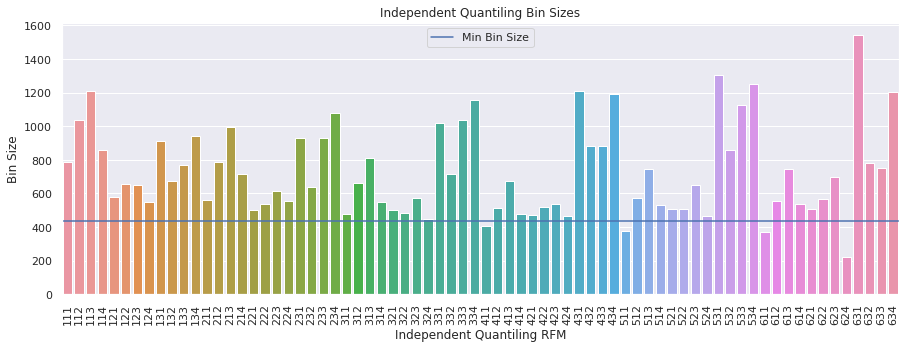


For independent quantiling, 4 bin(s) are too small.



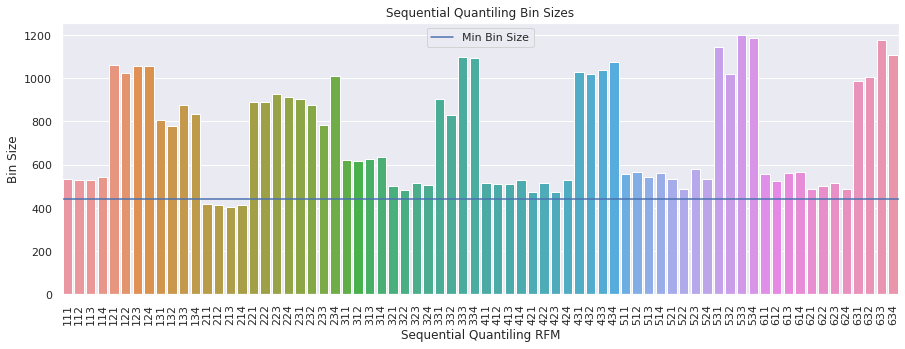


For sequential quantiling, 4 bin(s) are too small.



In [8]:
%run ./sub-notebooks/plots.ipynb

## Metrics Check

In [9]:
%run ./sub-notebooks/metrics.ipynb


Stats for Logistic Regression Model

Correlation Check

Correlation
Variables: zip_008, numords_std, dollars_norm_std, last_std, owntaxprod
Null hyp.: variables x and y are not correlated
Alt. hyp.: variables x and y are correlated

Correlation matrix:
                 zip_008 numords_std dollars_norm_std last_std
numords_std       -0.008                                      
dollars_norm_std  -0.007      -0.101                          
last_std          -0.001       -0.13            0.035         
owntaxprod        -0.003        0.12           -0.011    -0.02

p.values:
                 zip_008 numords_std dollars_norm_std last_std
numords_std        0.023                                      
dollars_norm_std    0.07         0.0                          
last_std           0.852         0.0              0.0         
owntaxprod         0.383         0.0            0.002      0.0
None


VIF

            variable    vif    Rsq
0  ver_upgrade[T.01]  1.082  0.075
1  ver_upgrade[T.10]  1

/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:1889: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pyrsm/perf.py:640: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(calculate_metrics(key, val, p))
/opt/conda/lib/python3.9/site-packages/pyrsm/perf.py:640: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(calculate_metrics(key, val, p))
/opt/conda/lib/python3.9/site-packages/pyrsm/perf.py:640: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.

  Type predictor    TP     FP    TN  FN  total    TPR    TNR  precision  \
0  All     rr_iq  1040  18657  2740  63  22500  0.943  0.128      0.053   

   Fscore  accuracy  kappa    profit  index   ROME  contact    AUC  
0     0.1     0.168  0.008  34627.23    1.0  1.247    0.875  0.643  



Sequential Quantiling RFM Metrics

  Type predictor    TP     FP    TN  FN  total    TPR    TNR  precision  \
0  All     rr_sq  1021  18313  3084  82  22500  0.926  0.144      0.053   

   Fscore  accuracy  kappa    profit  index   ROME  contact    AUC  
0     0.1     0.182  0.008  33999.06    1.0  1.247    0.859  0.646  



Logistic Regression Model Metrics

  Type   predictor   TP     FP    TN   FN  total    TPR    TNR  precision  \
0  All  pred_logit  962  12821  8576  141  22500  0.872  0.401       0.07   

   Fscore  accuracy  kappa    profit  index  ROME  contact    AUC  
0   0.129     0.424  0.042  38285.97    1.0  1.97    0.613  0.764  



Neural Network Model Metrics

  Type predictor   TP 

/opt/conda/lib/python3.9/site-packages/pyrsm/perf.py:640: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(calculate_metrics(key, val, p))


## CSV Generation

In [13]:
%run ./sub-notebooks/csv.ipynb

In [ ]:
# fig = rsm.gains_plot(, "click", "yes", ["pred_logit", "pred_nn2"])

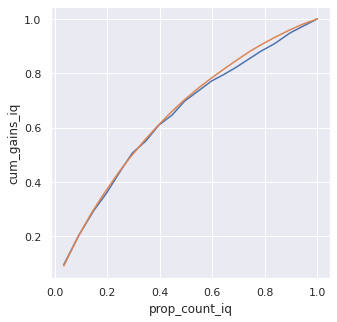

In [11]:
sns.set(rc = {'figure.figsize':(5,5)})
fig = sns.lineplot(x = 'prop_count_iq', y = 'cum_gains_iq', data = df_iq)
sns.lineplot(x = 'prop_count_iq', y = 'cum_gains_iq', data = df_iq_train)
plt.show()

In [32]:
from sklearn.metrics import auc, roc_curve

In [33]:
df_iq_calc_test = df_iq_calc[df_iq_calc['training'] == 0]
fpr, tpr, thresholds = roc_curve(df_iq_calc_test.res1_yes, df_iq_calc_test.rr_iq)
auc(fpr, tpr).round(10)

0.6427533605

ValueError: x is neither increasing nor decreasing : [0 0 0 ... 0 0 0].